In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from transformers import pipeline
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


#Data Loading and Preprocessing

In [ ]:
df=pd.read_csv('mediastack_retrieval.csv')
df.head()

,Title,Published At,Source,URL
0,Ethereum Classic (ETC) Market Cap Reaches $2.7...,2024-10-06T02:45:25+00:00,americanbankingnews,https://www.americanbankingnews.com/2024/10/05...
1,Ethereum (ETH) Trading 9.7% Lower Over Last Week,2024-10-06T01:06:09+00:00,americanbankingnews,https://www.americanbankingnews.com/2024/10/05...
2,iShares Ethereum Trust ETF (NASDAQ:ETHA) Tradi...,2024-10-05T21:22:57+00:00,americanbankingnews,https://www.americanbankingnews.com/2024/10/05...
3,How To Accept Crypto Payments On Your Website,2024-10-05T05:58:36+00:00,pressreleasenetwork,https://pressreleasenetwork.com/site/2024/10/0...
4,iShares Ethereum Trust ETF (NASDAQ:ETHA) Share...,2024-10-04T06:51:07+00:00,etfdailynews,https://www.etfdailynews.com/2024/10/04/ishare...


In [ ]:
df.shape

(257, 4)

In [ ]:
df.rename(columns={'Published At': 'Date'}, inplace=True)

In [ ]:
df = df.drop(['URL'],axis=1)

In [ ]:
df = df.drop_duplicates(subset='Title')
df = df.dropna(subset=['Title'])

In [ ]:
df['Title'] = df['Title'].str.lower()
df['Title'] = df['Title'].str.replace(f'[{string.punctuation}]', '')
df['Title'] = df['Title'].str.replace(r'\d+', '')
df['Title'] = df['Title'].str.replace(r'\s+', ' ', regex=True)

In [ ]:
df['Title'] = df['Title'].apply(word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
df['Title'] = df['Title'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
lemmatizer = WordNetLemmatizer()
df['Title'] = df['Title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df.head()

,Title,Date,Source
0,"[ethereum, classic, (, etc, ), market, cap, re...",2024-10-06,americanbankingnews
1,"[ethereum, (, eth, ), trading, 9.7, %, lower, ...",2024-10-06,americanbankingnews
2,"[ishares, ethereum, trust, etf, (, nasdaq, :, ...",2024-10-05,americanbankingnews
3,"[accept, crypto, payment, website]",2024-10-05,pressreleasenetwork
4,"[ishares, ethereum, trust, etf, (, nasdaq, :, ...",2024-10-04,etfdailynews


In [ ]:
df1=pd.read_csv('gdelt_retrieval.csv')
df1.head()

,Title,SeenDate,URL,Domain,Date
0,Cheating 9 to 5 : 13 Better Income Options,2024-10-06 10:00:00,https://bmmagazine.co.uk/business/cheating-9-t...,bmmagazine.co.uk,2023-10-07
1,JP Morgan Predicts Major Revenue Boost from Ba...,2024-10-06 09:15:00,https://insidebitcoins.com/news/jp-morgan-pred...,insidebitcoins.com,2023-10-07
2,US Spot Bitcoin ETFs Record $54 Million in Out...,2024-10-06 09:15:00,https://techreport.com/crypto-news/us-spot-bit...,techreport.com,2023-10-07
3,Evaluating the Risks and Rewards of Tezos Inve...,2024-10-06 08:30:00,https://gisuser.com/2024/10/evaluating-the-ris...,gisuser.com,2023-10-07
4,Kava : Top 3 Innovations in DeFi Lending Platf...,2024-10-06 08:30:00,https://gisuser.com/2024/10/kava-top-3-innovat...,gisuser.com,2023-10-07


In [ ]:
df1.shape

(7320, 5)

In [ ]:
df1=df1.drop(['SeenDate'],axis=1)

In [ ]:
df1=df1.drop(['URL'],axis=1)

In [ ]:
df1.rename(columns={'Domain': 'Source'}, inplace=True)

In [ ]:
df1 = df1.drop_duplicates(subset='Title')
df1 = df1.dropna(subset=['Title'])

In [ ]:
df1['Title'] = df1['Title'].str.lower()
df1['Title'] = df1['Title'].str.replace(f'[{string.punctuation}]', '')
df1['Title'] = df1['Title'].str.replace(r'\d+', '')
df1['Title'] = df1['Title'].str.replace(r'\s+', ' ', regex=True)
df1['Title'] = df1['Title'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df1['Title'] = df1['Title'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
df1['Title'] = df1['Title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
df1.head()

,Title,Source,Date
0,"[cheating, 9, 5, :, 13, better, income, option]",bmmagazine.co.uk,2023-10-07
1,"[jp, morgan, predicts, major, revenue, boost, ...",insidebitcoins.com,2023-10-07
2,"[u, spot, bitcoin, etf, record, $, 54, million...",techreport.com,2023-10-07
3,"[evaluating, risk, reward, tezos, investment, ...",gisuser.com,2023-10-07
4,"[kava, :, top, 3, innovation, defi, lending, p...",gisuser.com,2023-10-07


In [ ]:
df2=pd.read_csv('reddit_retrieval.csv')
df2.head()

,Title,Published At,URL,Source
0,Can’t withdrawal,2024-10-06,https://www.reddit.com/r/ethereum/comments/1fx...,Reddit
1,When using Groth16 on Ethereum through ᴇɪᴘ‒197...,2024-10-05,https://www.reddit.com/r/ethereum/comments/1fx...,Reddit
2,What is the Ethereum Virtual Machine (EVM)? Ba...,2024-10-05,https://learn.backpack.exchange/articles/what-...,Reddit
3,Staking or not staking? That is the question…,2024-10-05,https://www.reddit.com/r/ethereum/comments/1fw...,Reddit
4,Latest Week in Ethereum News,2024-10-05,https://weekinethereumnews.com/week-in-ethereu...,Reddit


In [ ]:
df2 = df2.drop_duplicates(subset='Title')
df2 = df2.dropna(subset=['Title'])

In [ ]:
df2.shape

(558, 4)

In [ ]:
df2['Title'] = df2['Title'].str.lower()
df2['Title'] = df2['Title'].str.replace(f'[{string.punctuation}]', '')
df2['Title'] = df2['Title'].str.replace(r'\d+', '')
df2['Title'] = df2['Title'].str.replace(r'\s+', ' ', regex=True)
df2['Title'] = df2['Title'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df2['Title'] = df2['Title'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
df2['Title'] = df2['Title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
df2.drop(['URL'],axis=1)

,Title,Published At,Source
0,"[’, withdrawal]",2024-10-06,Reddit
1,"[using, groth16, ethereum, ᴇɪᴘ‒197, ,, really,...",2024-10-05,Reddit
2,"[ethereum, virtual, machine, (, evm, ), ?, bac...",2024-10-05,Reddit
3,"[staking, staking, ?, question…]",2024-10-05,Reddit
4,"[latest, week, ethereum, news]",2024-10-05,Reddit
...,...,...,...
569,"[eth, code, complexity, flaw]",2024-05-21,Reddit
570,"[wbeth, ?]",2024-05-21,Reddit
571,"[staking, ethereum, (, eth, ), trezor]",2024-05-20,Reddit
572,"[sent, eth, etc, address, robinhood]",2024-05-20,Reddit


In [ ]:
df2.rename(columns={'Published At': 'Date'}, inplace=True)

In [ ]:
ethereum_news = pd.concat([df, df1, df2], ignore_index=True)

In [ ]:
ethereum_news['Date'] = pd.to_datetime(ethereum_news['Date'])

In [ ]:
ethereum_news = ethereum_news.sort_values(by='Date')

In [ ]:
ethereum_news.head()

,Title,Date,Source,URL
249,"[cheating, 9, 5, :, 13, better, income, option]",2023-10-07,bmmagazine.co.uk,NaN
268,"[achain, (, act, ), 1, -, day, volume, top, $,...",2023-10-07,tickerreport.com,NaN
267,"[maneki, price, 31, ., 7, %, last, week, (, ma...",2023-10-07,tickerreport.com,NaN
266,"[lido, staked, matic, (, stmatic, ), self, rep...",2023-10-07,tickerreport.com,NaN
265,"[taiko, hit, self, reported, market, cap, $, 1...",2023-10-07,tickerreport.com,NaN


In [ ]:
ethereum_news.reset_index(drop=True, inplace=True)

In [ ]:
ethereum_news=ethereum_news.drop(['URL'],axis=1)

In [ ]:
ethereum_news.isnull().sum()

Title     0
Date      0
Source    0
dtype: int64

In [ ]:
ethereum_news.shape

(827, 3)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)


ethereum_news['Tokens']=ethereum_news['Title'].map(lambda s:preprocess(s))

In [ ]:
ethereum_news.head()

,Title,Date,Source,Tokens
0,"[cheating, 9, 5, :, 13, better, income, option]",2023-10-07,bmmagazine.co.uk,cheating better income option
1,"[achain, (, act, ), 1, -, day, volume, top, $,...",2023-10-07,tickerreport.com,achain act day volume top
2,"[maneki, price, 31, ., 7, %, last, week, (, ma...",2023-10-07,tickerreport.com,maneki price last week maneki
3,"[lido, staked, matic, (, stmatic, ), self, rep...",2023-10-07,tickerreport.com,lido staked matic stmatic self reported market...
4,"[taiko, hit, self, reported, market, cap, $, 1...",2023-10-07,tickerreport.com,taiko hit self reported market cap million taiko


In [ ]:
price_data=pd.read_csv('eth_daily_prices_sept_2023_to_oct_2024.csv')
price_data.head()

,Date,Open Price (USD),High Price (USD),Low Price (USD),Close Price (USD),Volume
0,2023-09-02,1628.67,1644.50,1627.69,1636.89,3243.675721
1,2023-09-03,1636.89,1646.97,1625.11,1635.79,4577.329291
2,2023-09-04,1635.80,1643.37,1616.21,1629.17,5476.966673
3,2023-09-05,1629.17,1646.81,1608.13,1633.46,16519.124389
4,2023-09-06,1633.46,1668.43,1609.06,1632.29,18376.350432


In [ ]:
ethereum_news['Date'] = pd.to_datetime(ethereum_news['Date'])
price_data['Date'] = pd.to_datetime(price_data['Date'])

In [ ]:
price_data.isnull().sum()

Date                 0
Open Price (USD)     0
High Price (USD)     0
Low Price (USD)      0
Close Price (USD)    0
Volume               0
dtype: int64

In [ ]:
ethereum_news = pd.merge(ethereum_news, price_data, on='Date', how='inner')

In [ ]:
ethereum_news = ethereum_news.drop(ethereum_news.index[0:22])


In [ ]:
#ethereum_news.to_csv('ethereum_news.csv')

#Feature Engineering


###VADER

In [ ]:
analyzer = SentimentIntensityAnalyzer()
ethereum_news['VADER Sentiment'] = ethereum_news['Tokens'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
ethereum_news['Price Change (%)'] = ((ethereum_news['Close Price (USD)'] - ethereum_news['Low Price (USD)']) / ethereum_news['Low Price (USD)'])*100

In [ ]:
ethereum_news

,Title,Date,Source,Tokens,Open Price (USD),High Price (USD),Low Price (USD),Close Price (USD),Volume,VADER Sentiment,Price Change (%)
22,"[staking, ethereum, (, eth, ), trezor]",2024-05-20,Reddit,staking ethereum eth trezor,3071.79,3690.83,3050.00,3661.30,42651.590660,0.0000,20.042623
23,"[adjusting, eth, issuance, curve]",2024-05-21,Reddit,adjusting eth issuance curve,3661.31,3838.00,3628.01,3789.23,42727.995450,0.0000,4.443758
24,"[wbeth, ?]",2024-05-21,Reddit,wbeth,3661.31,3838.00,3628.01,3789.23,42727.995450,0.0000,4.443758
25,"[eth, code, complexity, flaw]",2024-05-21,Reddit,eth code complexity flaw,3661.31,3838.00,3628.01,3789.23,42727.995450,0.0000,4.443758
26,"[sec, asked, eth, etf, application, updated, ....",2024-05-21,Reddit,sec asked eth etf application updated happened...,3661.31,3838.00,3628.01,3789.23,42727.995450,0.4215,4.443758
...,...,...,...,...,...,...,...,...,...,...,...
806,"[ethereum, classic, 24, hour, volume, reach, $...",2024-10-03,americanbankingnews,ethereum classic hour volume reach million etc,2363.92,2402.24,2321.01,2343.00,3198.645396,0.0258,0.947432
807,"[ethereum, (, eth, ), market, cap, reach, $, 2...",2024-10-03,americanbankingnews,ethereum eth market cap reach billion,2363.92,2402.24,2321.01,2343.00,3198.645396,0.0258,0.947432
808,"[ethereum, classic, (, etc, ), trading, 9.6, %...",2024-10-03,americanbankingnews,ethereum classic etc trading lower last day,2363.92,2402.24,2321.01,2343.00,3198.645396,-0.2960,0.947432
809,"[eth, :, grayscale, ethereum, mini, trust, ,, ...",2024-10-03,Seeking Alpha,eth grayscale ethereum mini trust making sense...,2363.92,2402.24,2321.01,2343.00,3198.645396,0.5106,0.947432


###BERT

In [ ]:
general_sentiment_classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

ethereum_news['Cleaned Tokens'] = ethereum_news['Tokens'].apply(clean_text)
def bert_sentiment(text):
    result = general_sentiment_classifier(text)
    sentiment_result = result[0]
    score = sentiment_result['score']
    label = sentiment_result['label']

    # Map the star labels to numeric scores
    star_map = {
        '1 star': -2,
        '2 stars': -1,
        '3 stars': 0,
        '4 stars': 1,
        '5 stars': 2
    }


    numeric_score = star_map.get(label, 0)

    return numeric_score, score

ethereum_news[['General BERT Sentiment Score', 'General BERT Confidence Score']] = ethereum_news['Cleaned Tokens'].apply(bert_sentiment).apply(pd.Series)

print(ethereum_news[['Tokens', 'Cleaned Tokens', 'General BERT Sentiment Score', 'General BERT Confidence Score']].head())


                                               Tokens  \
22                        staking ethereum eth trezor   
23                       adjusting eth issuance curve   
24                                              wbeth   
25                           eth code complexity flaw   
26  sec asked eth etf application updated happened...   

                                       Cleaned Tokens  \
22                        staking ethereum eth trezor   
23                       adjusting eth issuance curve   
24                                              wbeth   
25                           eth code complexity flaw   
26  sec asked eth etf application updated happened...   

    General BERT Sentiment Score  General BERT Confidence Score  
22                          -2.0                       0.437121  
23                           1.0                       0.411577  
24                           0.0                       0.257268  
25                          -1.0                 

###TextBLob

In [ ]:
ethereum_news['TextBlob Sentiment'] = ethereum_news['Tokens'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
ethereum_news = ethereum_news.reset_index(drop=True)

In [ ]:
ethereum_news.columns

Index(['Title', 'Date', 'Source', 'Tokens', 'Open Price (USD)',
       'High Price (USD)', 'Low Price (USD)', 'Close Price (USD)', 'Volume',
       'VADER Sentiment', 'Price Change (%)', 'Cleaned Tokens',
       'General BERT Sentiment Score', 'General BERT Confidence Score',
       'TextBlob Sentiment'],
      dtype='object')

In [ ]:
correlation_result_price_change = ethereum_news[['Price Change (%)', 'VADER Sentiment', 'General BERT Sentiment Score', 'TextBlob Sentiment']].corr()
print(correlation_result_price_change)

                              Price Change (%)  VADER Sentiment  \
Price Change (%)                      1.000000        -0.037130   
VADER Sentiment                      -0.037130         1.000000   
General BERT Sentiment Score         -0.108203         0.302813   
TextBlob Sentiment                   -0.026963         0.400799   

                              General BERT Sentiment Score  TextBlob Sentiment  
Price Change (%)                                 -0.108203           -0.026963  
VADER Sentiment                                   0.302813            0.400799  
General BERT Sentiment Score                      1.000000            0.257963  
TextBlob Sentiment                                0.257963            1.000000  


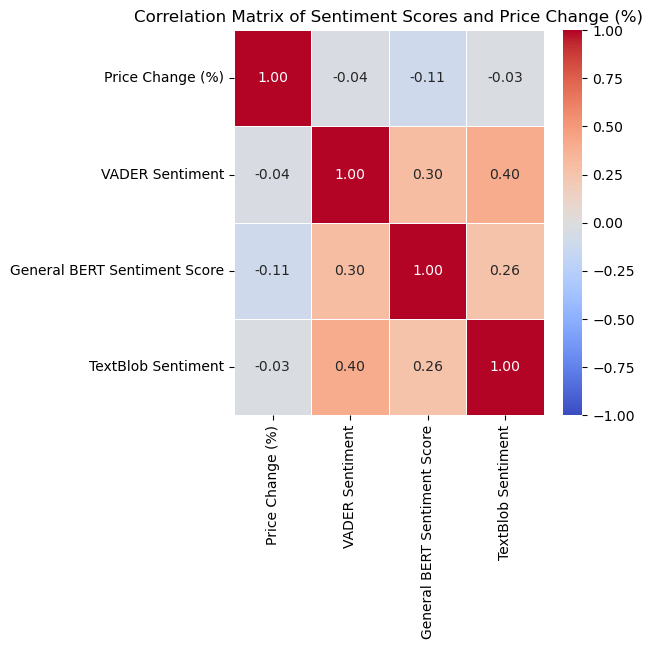

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_result_price_change, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Sentiment Scores and Price Change (%)')
plt.show()

In [ ]:
ethereum_news.dtypes

Title                                    object
Date                             datetime64[ns]
Source                                   object
Tokens                                   object
Open Price (USD)                        float64
High Price (USD)                        float64
Low Price (USD)                         float64
Close Price (USD)                       float64
Volume                                  float64
VADER Sentiment                         float64
Price Change (%)                        float64
Cleaned Tokens                           object
General BERT Sentiment Score            float64
General BERT Confidence Score           float64
TextBlob Sentiment                      float64
dtype: object

In [ ]:
ethereum_news['Price Change (%)'] = pd.to_numeric(ethereum_news['Price Change (%)'], errors='coerce')
ethereum_news['Absolute Price Change (%)'] = ethereum_news['Price Change (%)'].abs()

daily_data = ethereum_news.groupby('Date').apply(
    lambda x: pd.Series({
        'Price Change (%)': (x['Price Change (%)'] * x['Absolute Price Change (%)']).sum() / x['Absolute Price Change (%)'].sum(),
        'VADER Sentiment': (x['VADER Sentiment'] * x['Absolute Price Change (%)']).sum() / x['Absolute Price Change (%)'].sum(),
        'General BERT Sentiment Score': (x['General BERT Sentiment Score'] * x['Absolute Price Change (%)']).sum() / x['Absolute Price Change (%)'].sum(),
        'TextBlob Sentiment': (x['TextBlob Sentiment'] * x['Absolute Price Change (%)']).sum() / x['Absolute Price Change (%)'].sum()
    })
).reset_index()
correlation_result_wgt_score = daily_data[['Price Change (%)', 'VADER Sentiment', 'General BERT Sentiment Score', 'TextBlob Sentiment']].corr()
print(correlation_result_wgt_score)

                              Price Change (%)  VADER Sentiment  \
Price Change (%)                      1.000000        -0.085920   
VADER Sentiment                      -0.085920         1.000000   
General BERT Sentiment Score         -0.239184         0.293285   
TextBlob Sentiment                   -0.034474         0.506785   

                              General BERT Sentiment Score  TextBlob Sentiment  
Price Change (%)                                 -0.239184           -0.034474  
VADER Sentiment                                   0.293285            0.506785  
General BERT Sentiment Score                      1.000000            0.220612  
TextBlob Sentiment                                0.220612            1.000000  


C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_12508\2585479311.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_data = ethereum_news.groupby('Date').apply(


In [ ]:
ethereum_news['VADER Sentiment'] = pd.to_numeric(ethereum_news['VADER Sentiment'], errors='coerce')
ethereum_news['General BERT Sentiment Score'] = pd.to_numeric(ethereum_news['General BERT Sentiment Score'], errors='coerce')
ethereum_news['TextBlob Sentiment'] = pd.to_numeric(ethereum_news['TextBlob Sentiment'], errors='coerce')
ethereum_news.dropna(subset=['VADER Sentiment', 'General BERT Sentiment Score', 'TextBlob Sentiment'], inplace=True)

ethereum_news['VADER Sentiment Norm'] = (ethereum_news['VADER Sentiment'] - ethereum_news['VADER Sentiment'].min()) / (ethereum_news['VADER Sentiment'].max() - ethereum_news['VADER Sentiment'].min())
ethereum_news['General BERT Sentiment Norm'] = (ethereum_news['General BERT Sentiment Score'] - ethereum_news['General BERT Sentiment Score'].min()) / (ethereum_news['General BERT Sentiment Score'].max() - ethereum_news['General BERT Sentiment Score'].min())
ethereum_news['TextBlob Sentiment Norm'] = (ethereum_news['TextBlob Sentiment'] - ethereum_news['TextBlob Sentiment'].min()) / (ethereum_news['TextBlob Sentiment'].max() - ethereum_news['TextBlob Sentiment'].min())

#Average of the Sentiment Scores
ethereum_news['Average Sentiment'] = ethereum_news[['VADER Sentiment Norm', 'General BERT Sentiment Norm', 'TextBlob Sentiment Norm']].mean(axis=1)

#correlation with Price Change
correlation_result_avg_sentiment = ethereum_news[['Price Change (%)', 'Average Sentiment']].corr()
print(correlation_result_avg_sentiment)

                   Price Change (%)  Average Sentiment
Price Change (%)           1.000000          -0.099893
Average Sentiment         -0.099893           1.000000


In [ ]:
ethereum_news['Price Change (%) Lagged'] = ethereum_news['Price Change (%)'].shift(-1)

# correlation with the lagged price change
correlation_lagged = ethereum_news[['Price Change (%) Lagged', 'Average Sentiment']].corr()
print(correlation_lagged)

                         Price Change (%) Lagged  Average Sentiment
Price Change (%) Lagged                 1.000000          -0.067041
Average Sentiment                      -0.067041           1.000000


In [ ]:
extreme_sentiment = ethereum_news[(ethereum_news['Average Sentiment'] > 0.8) | (ethereum_news['Average Sentiment'] < 0.2)]

# correlation for extreme sentiment cases only
correlation_extreme = extreme_sentiment[['Price Change (%)', 'Average Sentiment']].corr()
print(correlation_extreme)

                   Price Change (%)  Average Sentiment
Price Change (%)           1.000000           0.104131
Average Sentiment          0.104131           1.000000


In [ ]:
ethereum_news['Volume Norm'] = (ethereum_news['Volume'] - ethereum_news['Volume'].min()) / (ethereum_news['Volume'].max() - ethereum_news['Volume'].min())

# Hybrid Sentiments
ethereum_news['Sentiment and Volume'] = ethereum_news['Average Sentiment'] * ethereum_news['Volume Norm']

# correlation between this new feature and price change
correlation_sentiment_volume = ethereum_news[['Price Change (%)', 'Sentiment and Volume']].corr()
print(correlation_sentiment_volume)


                      Price Change (%)  Sentiment and Volume
Price Change (%)              1.000000              0.585954
Sentiment and Volume          0.585954              1.000000


#Exploratory Data Analysis

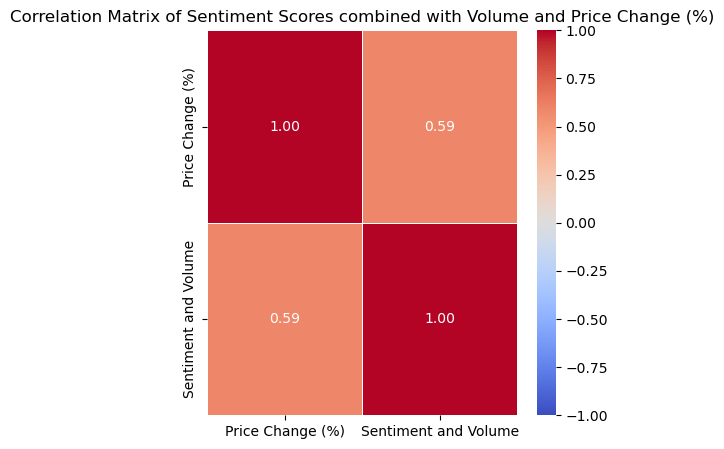

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_sentiment_volume, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Sentiment Scores combined with Volume and Price Change (%)')
plt.show()

In [ ]:
clean_data = ethereum_news.dropna(subset=['Price Change (%)', 'Sentiment and Volume'])
X = clean_data['Sentiment and Volume'].values.reshape(-1, 1)
y = clean_data['Price Change (%)'].values

#linear regression model
model = LinearRegression()
model.fit(X, y)
print('R-squared:', model.score(X, y))

R-squared: 0.34334188910106933


In [ ]:
# correlations between sentiment scores, average sentiment score, sentiment with volume, and price changes
correlation_matrix = ethereum_news[[
    'VADER Sentiment',
    'General BERT Sentiment Score',
    'TextBlob Sentiment',
    'Average Sentiment',
    'Volume Norm',
    'Sentiment and Volume',
    'Price Change (%)'
]].corr()

Correlation Matrix:
                              VADER Sentiment  General BERT Sentiment Score  \
VADER Sentiment                      1.000000                      0.302813   
General BERT Sentiment Score         0.302813                      1.000000   
TextBlob Sentiment                   0.400799                      0.257963   
Average Sentiment                    0.623637                      0.912517   
Volume Norm                         -0.029282                     -0.115199   
Sentiment and Volume                 0.163774                      0.181406   
Price Change (%)                    -0.037130                     -0.108203   

                              TextBlob Sentiment  Average Sentiment  \
VADER Sentiment                         0.400799           0.623637   
General BERT Sentiment Score            0.257963           0.912517   
TextBlob Sentiment                      1.000000           0.526874   
Average Sentiment                       0.526874           1.00

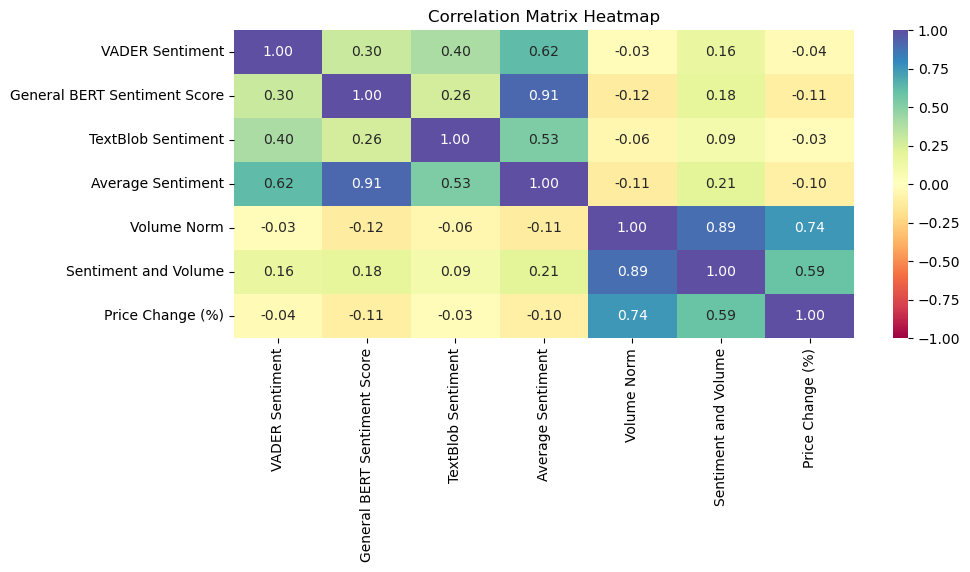

In [ ]:
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_12508\1140421217.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VADER Sentiment Category', data=ethereum_news, ax=axes[0], palette='coolwarm')
C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_12508\1140421217.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BERT Sentiment Category', data=ethereum_news, ax=axes[1], palette='coolwarm')
C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_12508\1140421217.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TextBl

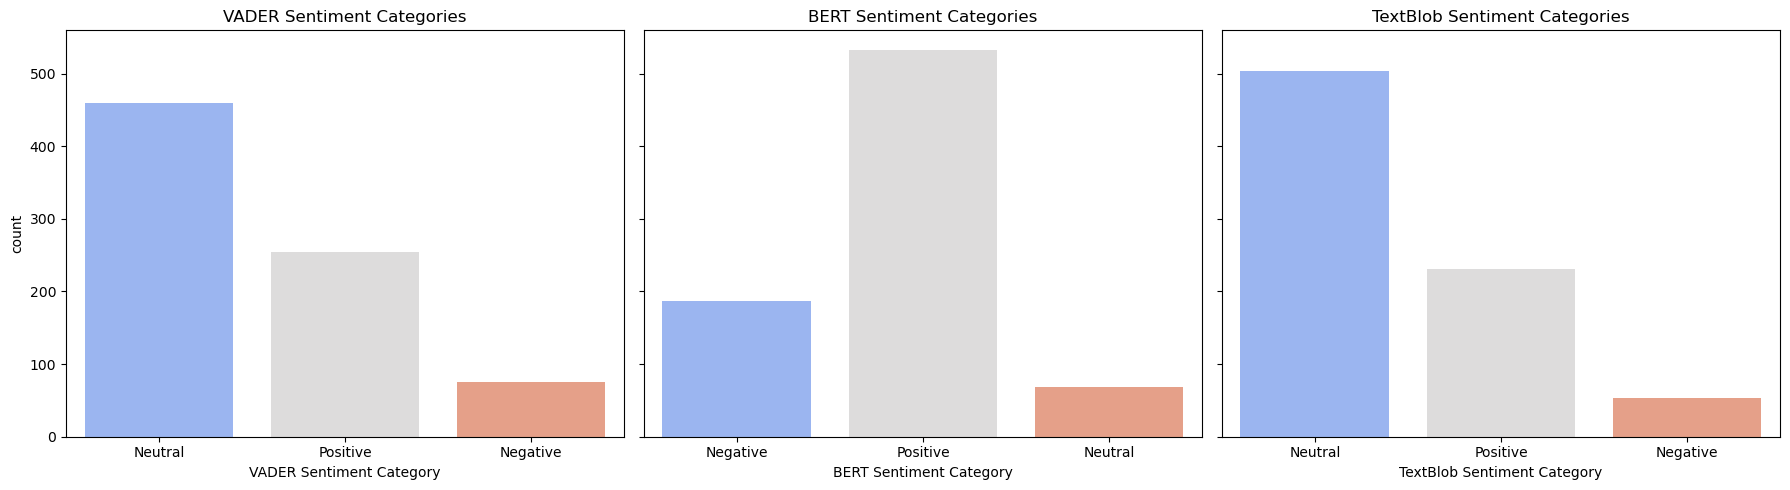

In [ ]:
ethereum_news['VADER Sentiment Category'] = ethereum_news['VADER Sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral'
)
ethereum_news['BERT Sentiment Category'] = ethereum_news['General BERT Sentiment Score'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)
ethereum_news['TextBlob Sentiment Category'] = ethereum_news['TextBlob Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
sns.countplot(x='VADER Sentiment Category', data=ethereum_news, ax=axes[0], palette='coolwarm')
axes[0].set_title('VADER Sentiment Categories')

sns.countplot(x='BERT Sentiment Category', data=ethereum_news, ax=axes[1], palette='coolwarm')
axes[1].set_title('BERT Sentiment Categories')

sns.countplot(x='TextBlob Sentiment Category', data=ethereum_news, ax=axes[2], palette='coolwarm')
axes[2].set_title('TextBlob Sentiment Categories')

plt.tight_layout()
plt.show()


C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_12508\3817777670.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Average Sentiment Category', data=ethereum_news, palette='viridis')


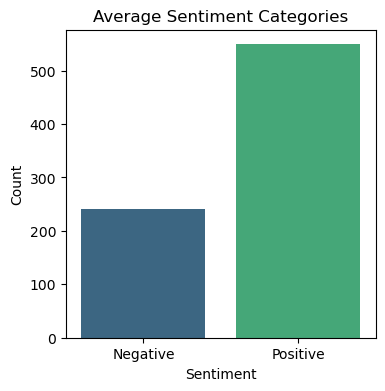

In [ ]:
ethereum_news['Average Sentiment Category'] = ethereum_news['Average Sentiment'].apply(
    lambda x: 'Positive' if x > 0.5 else 'Negative' if x < 0.5 else 'Neutral'
)

plt.figure(figsize=(4, 4))
sns.countplot(x='Average Sentiment Category', data=ethereum_news, palette='viridis')
plt.title('Average Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
high_threshold = 0.75
low_threshold = 0.25
extreme_sentiment = ethereum_news[
    (ethereum_news['Average Sentiment'] > high_threshold) |
    (ethereum_news['Average Sentiment'] < low_threshold)
]
extreme_sentiment['Sentiment and Volume'] = (
    extreme_sentiment['Average Sentiment'] * extreme_sentiment['Volume Norm']
)
correlation_extreme = extreme_sentiment[['Price Change (%)', 'Sentiment and Volume']].corr()

print("Correlation for Extreme Sentiment Cases:")
print(correlation_extreme)


Correlation for Extreme Sentiment Cases:
                      Price Change (%)  Sentiment and Volume
Price Change (%)              1.000000              0.421488
Sentiment and Volume          0.421488              1.000000


C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_9512\2442469810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_sentiment['Sentiment and Volume'] = (


In [ ]:
extreme_sentiment['Price Change Lagged'] = extreme_sentiment['Price Change (%)'].shift(-1)
correlation_lagged = extreme_sentiment[['Price Change Lagged', 'Sentiment and Volume']].corr()
print("Correlation with Lagged Price Change:")
print(correlation_lagged)


Correlation with Lagged Price Change:
                      Price Change Lagged  Sentiment and Volume
Price Change Lagged              1.000000              0.215566
Sentiment and Volume             0.215566              1.000000


C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_9512\1296699726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_sentiment['Price Change Lagged'] = extreme_sentiment['Price Change (%)'].shift(-1)


In [ ]:
difference = Counter(ethereum_news['Source'])
sources = list(difference.keys())
counts = list(difference.values())
colors = ['crimson', 'limegreen'] * (len(sources) // 2 + 1)

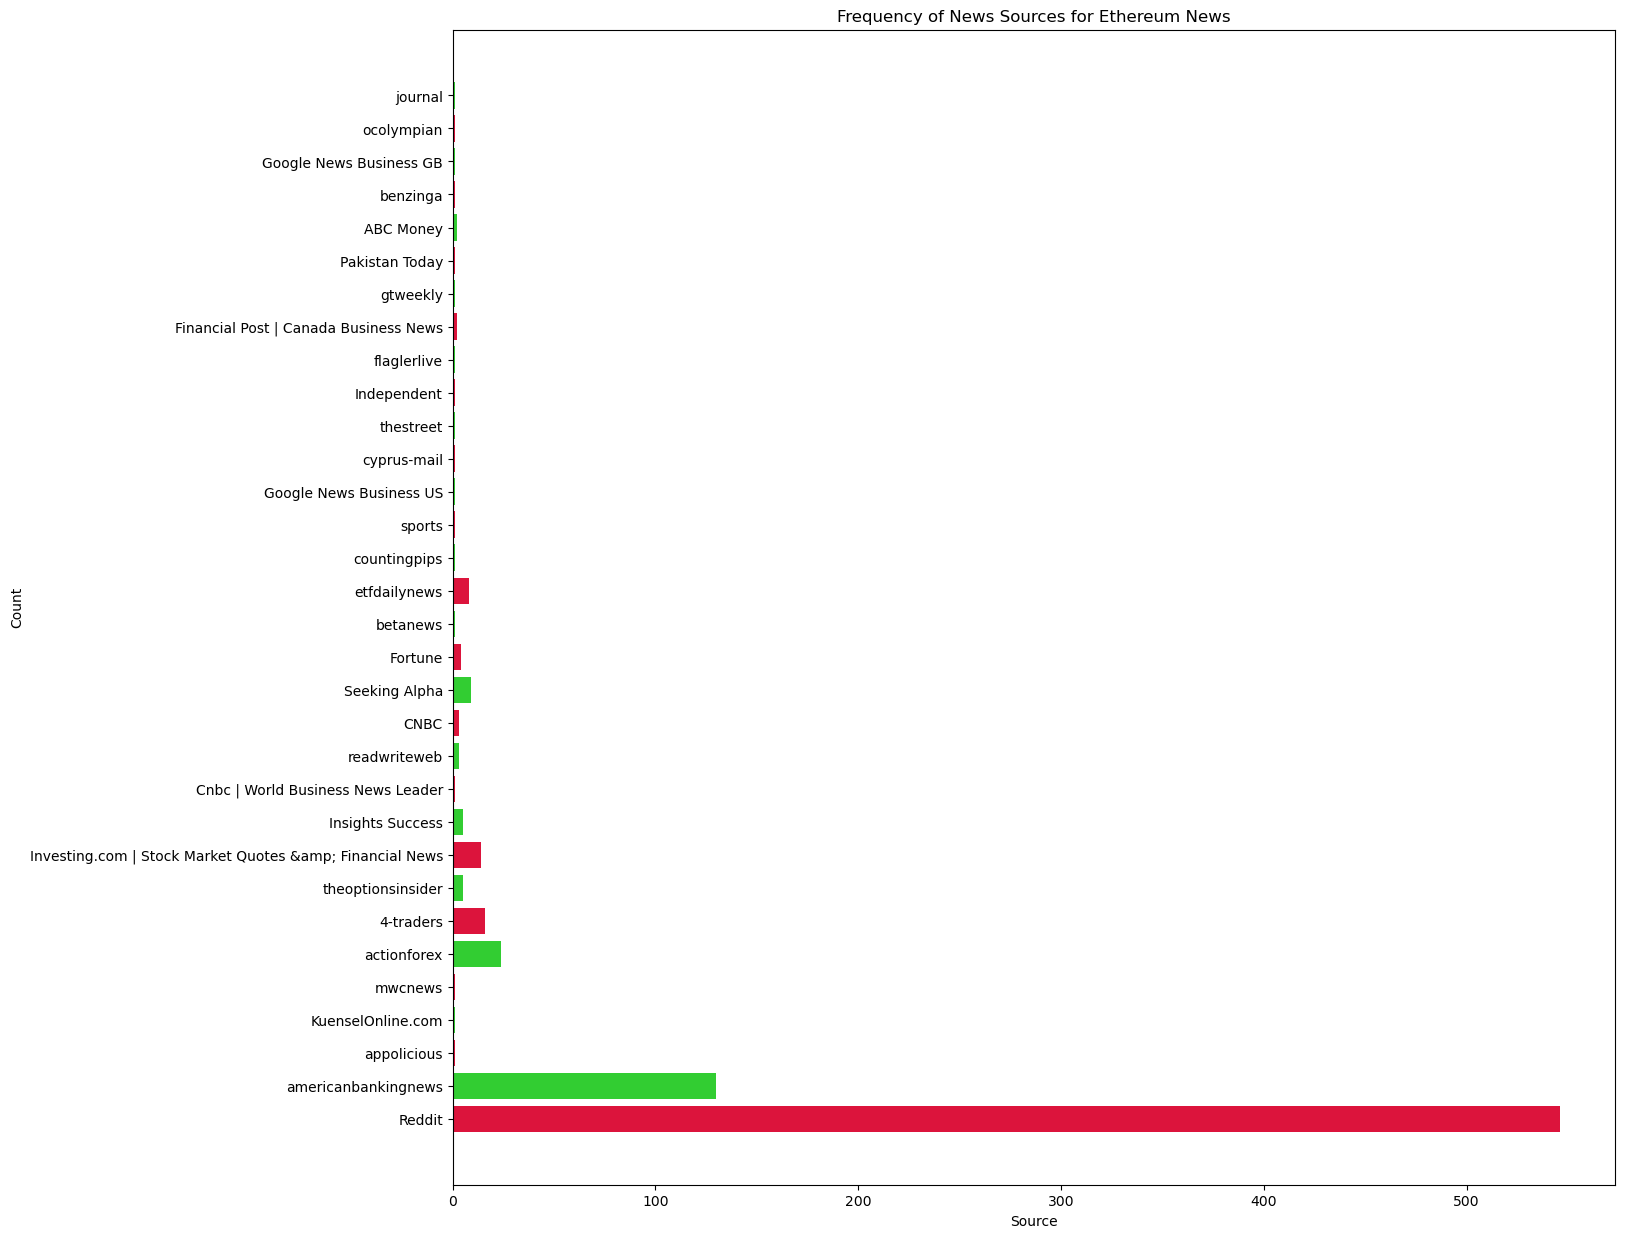

In [ ]:
plt.figure(figsize=(15, 15))
plt.barh(sources, counts, color=colors[:len(sources)])
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Frequency of News Sources for Ethereum News')
plt.show()

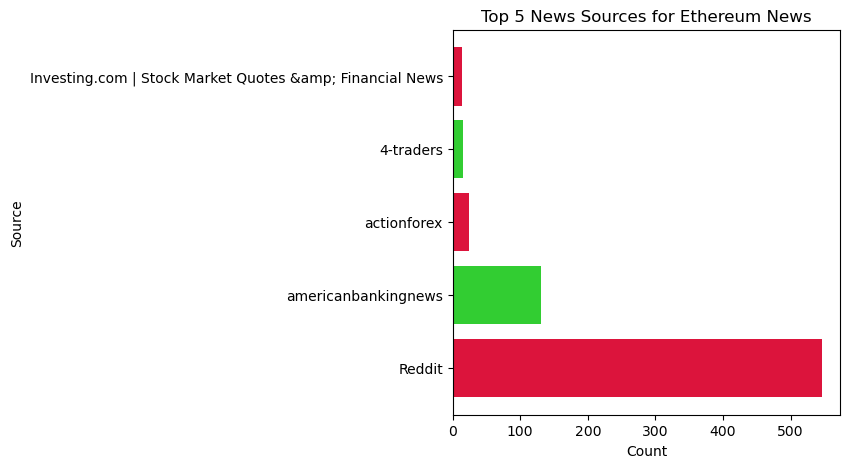

In [ ]:
top_n = 5
top_sources = difference.most_common(top_n)
sources, counts = zip(*top_sources)
colors = ['crimson', 'limegreen'] * (len(sources) // 2 + 1)

plt.figure(figsize=(5, 5))
plt.barh(sources, counts, color=colors[:len(sources)])
plt.xlabel('Count')
plt.ylabel('Source')
plt.title(f'Top {top_n} News Sources for Ethereum News')
plt.show()

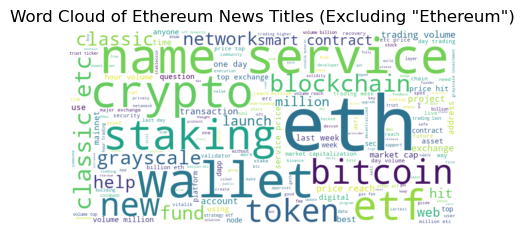

In [ ]:
text = " ".join(title for title in ethereum_news['Tokens'])
stopwords = set(STOPWORDS)
stopwords.add('ethereum')
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=stopwords).generate(text)

plt.figure(figsize=(5, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Ethereum News Titles (Excluding "Ethereum")')
plt.show()

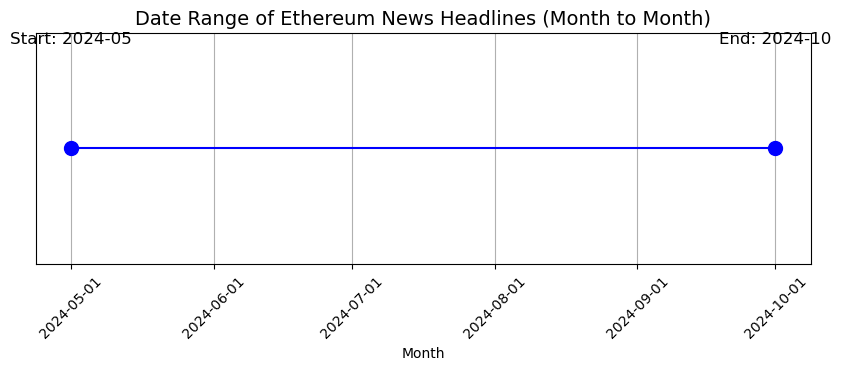

In [ ]:
ethereum_news['Month'] = ethereum_news['Date'].dt.to_period('M')

start_month = ethereum_news['Month'].min()
end_month = ethereum_news['Month'].max()

plt.figure(figsize=(10, 3))
plt.plot([start_month.start_time, end_month.start_time], [1, 1], color='blue', marker='o', markersize=10)
plt.text(start_month.start_time, 1.05, f'Start: {start_month}', ha='center', fontsize=12)
plt.text(end_month.start_time, 1.05, f'End: {end_month}', ha='center', fontsize=12)
plt.title('Date Range of Ethereum News Headlines (Month to Month)', fontsize=14)
plt.xlabel('Month')
plt.yticks([])
plt.grid(True)
plt.xticks(pd.date_range(start=start_month.start_time, end=end_month.start_time, freq='MS'), rotation=45)
plt.show()

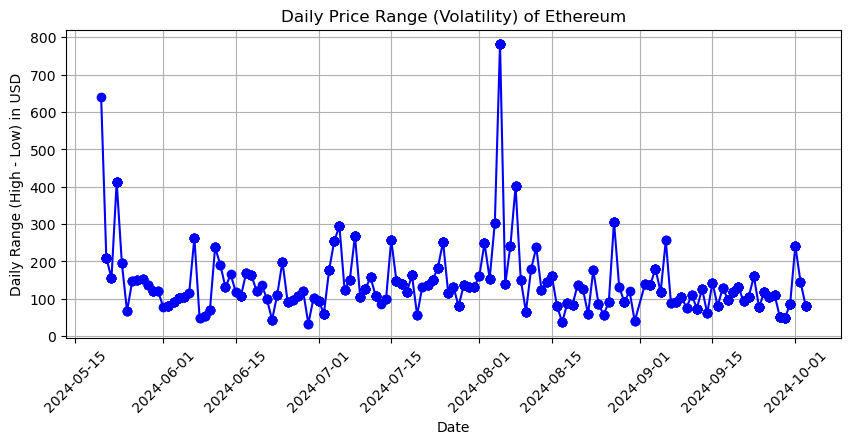

In [ ]:
ethereum_news['Daily Range (USD)'] = ethereum_news['High Price (USD)'] - ethereum_news['Low Price (USD)']
plt.figure(figsize=(10, 4))
plt.plot(ethereum_news['Date'], ethereum_news['Daily Range (USD)'], marker='o', color='blue')
plt.title('Daily Price Range (Volatility) of Ethereum')
plt.xlabel('Date')
plt.ylabel('Daily Range (High - Low) in USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

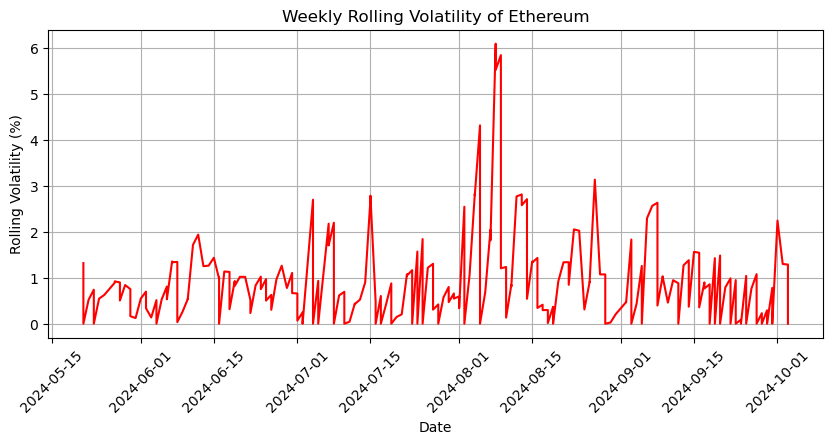

In [ ]:
ethereum_news['Returns'] = ethereum_news['Close Price (USD)'].pct_change()

ethereum_news['Rolling Volatility'] = ethereum_news['Returns'].rolling(window=7).std() * 100  # In percentage terms

plt.figure(figsize=(10, 4))
plt.plot(ethereum_news['Date'], ethereum_news['Rolling Volatility'], color='red', marker='')
plt.title('Weekly Rolling Volatility of Ethereum')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


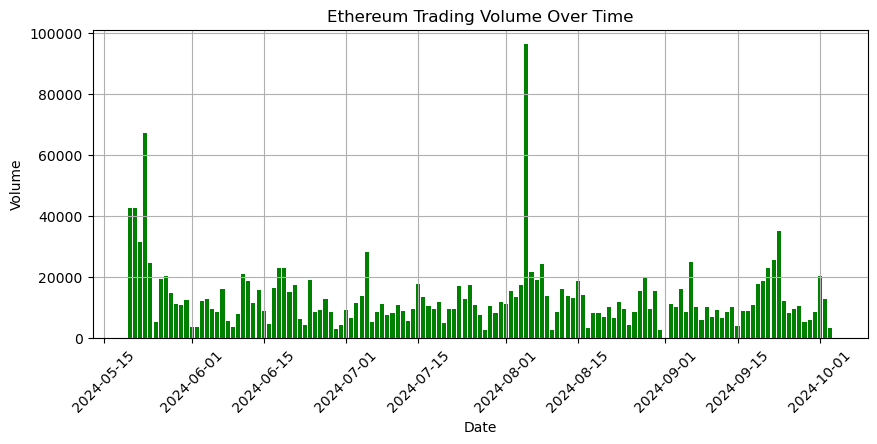

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(ethereum_news['Date'], ethereum_news['Volume'], color='green')
plt.title('Ethereum Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


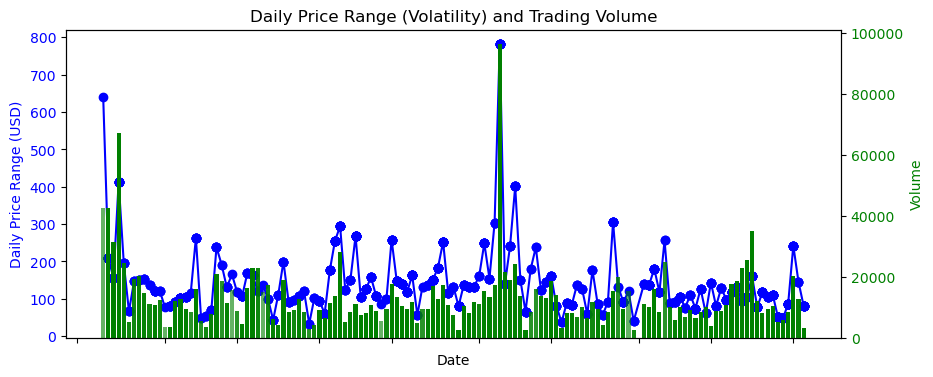

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(ethereum_news['Date'], ethereum_news['Daily Range (USD)'], color='blue', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Price Range (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.bar(ethereum_news['Date'], ethereum_news['Volume'], color='green', alpha=0.6)
ax2.set_ylabel('Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Daily Price Range (Volatility) and Trading Volume')
ax1.set_xticklabels([])
plt.show()

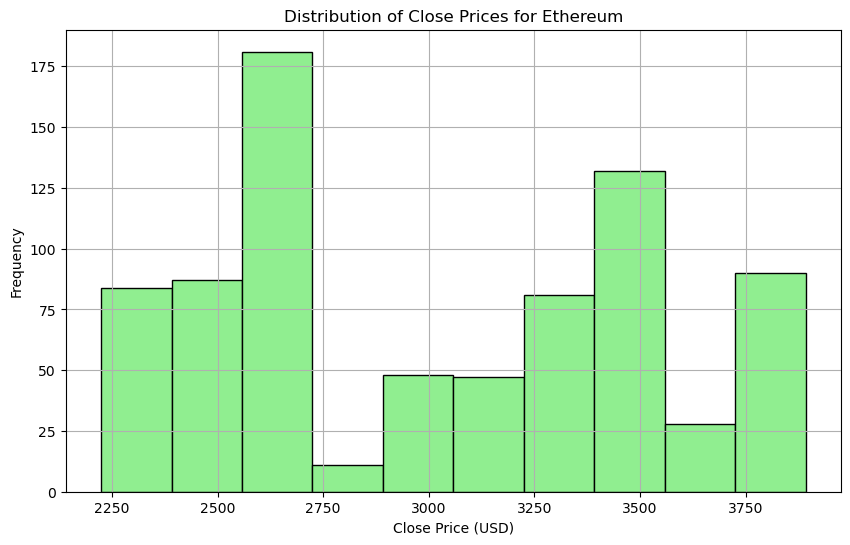

In [ ]:
close_prices = ethereum_news['Close Price (USD)']
plt.figure(figsize=(10, 6))
plt.hist(close_prices, bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Close Prices for Ethereum')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

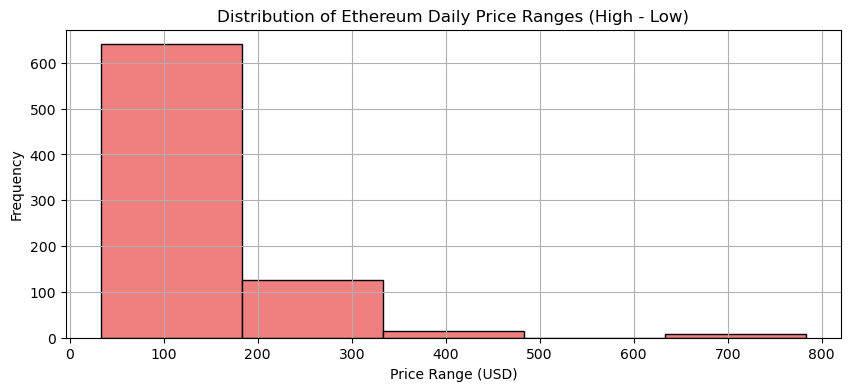

In [ ]:
price_ranges = ethereum_news['High Price (USD)'] - ethereum_news['Low Price (USD)']
plt.figure(figsize=(10, 4))
plt.hist(price_ranges, bins=5, color='lightcoral', edgecolor='black')
plt.title('Distribution of Ethereum Daily Price Ranges (High - Low)')
plt.xlabel('Price Range (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

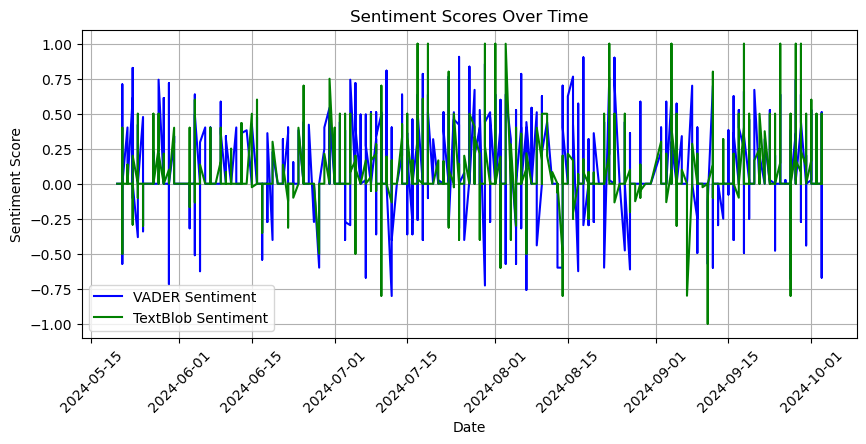

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(ethereum_news['Date'], ethereum_news['VADER Sentiment'], label='VADER Sentiment', color='blue')
plt.plot(ethereum_news['Date'], ethereum_news['TextBlob Sentiment'], label='TextBlob Sentiment', color='green')

plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

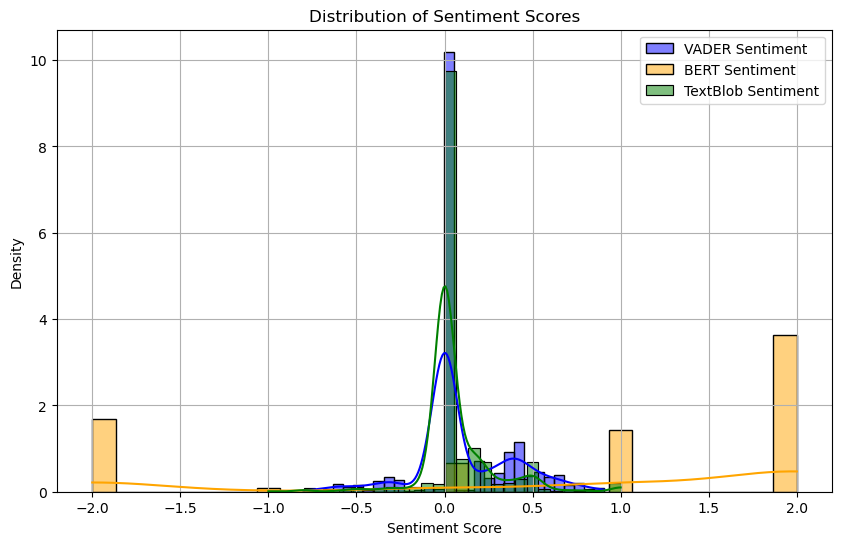

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ethereum_news['VADER Sentiment'], bins=30, color='blue', kde=True, label='VADER Sentiment', stat="density")
sns.histplot(ethereum_news['General BERT Sentiment Score'], bins=30, color='orange', kde=True, label='BERT Sentiment', stat="density")
sns.histplot(ethereum_news['TextBlob Sentiment'], bins=30, color='green', kde=True, label='TextBlob Sentiment', stat="density")

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [ ]:
ethereum_news.columns


Index(['Title', 'Date', 'Source', 'Tokens', 'Open Price (USD)',
       'High Price (USD)', 'Low Price (USD)', 'Close Price (USD)', 'Volume',
       'VADER Sentiment', 'Price Change (%)', 'Cleaned Tokens',
       'General BERT Sentiment Score', 'General BERT Confidence Score',
       'TextBlob Sentiment', 'Absolute Price Change (%)',
       'VADER Sentiment Norm', 'General BERT Sentiment Norm',
       'TextBlob Sentiment Norm', 'Average Sentiment',
       'Price Change (%) Lagged', 'Volume Norm', 'Sentiment and Volume',
       'Month', 'Daily Range (USD)', 'Returns', 'Rolling Volatility'],
      dtype='object')

##Stationarity Analysis

In [ ]:
data_to_test = ethereum_news['Price Change (%)']

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
adf_test(data_to_test)

ADF Statistic: -4.494819221514053
p-value: 0.0002009221869642006
Critical Values:
   1%: -3.4388710830827125
   5%: -2.8653008652386576
   10%: -2.568772659807725


In [ ]:
def kpss_test(series):
    statistic, p_value, lags, critical_values = kpss(series, regression='c')
    print('KPSS Statistic:', statistic)
    print('p-value:', p_value)
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
kpss_test(data_to_test)

KPSS Statistic: 0.10818897949326593
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\Naresh Kumar S\AppData\Local\Temp\ipykernel_12508\1740453313.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')
